In [2]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import numpy as np
import tensorflow as tf
import pandas as pd
import os


In [5]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Definir la transformación de las imágenes
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    
])
# Cargar el dataset de deformidades desde la carpeta
dataset = datasets.ImageFolder(root="/Users/guill/Escritorio/copiatest", transform=transform)
batch_size = 32
# Crear el DataLoader para cargar los datos
loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [22]:
'''


import os
from PIL import Image
import torchvision.transforms as transforms

# Ruta de la carpeta que contiene las imágenes de pies
folder_path = "/Users/guill/Escritorio/copiatest/normal"

# Lista para almacenar las imágenes de pies
images = []

# Obtener la lista de archivos en la carpeta
file_list = os.listdir(folder_path)


# Transformaciones de aumento de datos
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

# Recorrer los archivos de la carpeta
for file_name in file_list:
    # Obtener la ruta completa de la imagen
    image_path = os.path.join(folder_path, file_name)
    
    # Cargar la imagen utilizando PIL
    image = Image.open(image_path)
    
    
    # Convertir la imagen a escala de grises
    #image = image.convert('L')

    
    augmented_image  = transform(image)
    
    # Agregar la imagen a la lista
    images.append(augmented_image)

# Mostrar información de las imágenes cargadas
print("Cantidad de imágenes de pies:", len(images))
# Cargar las imágenes de pies desde una carpeta
print(type(image))
# Crear un objeto Dataset de PyTorch
dataset = torch.utils.data.TensorDataset(torch.stack(images))

# Crear el DataLoader para cargar los datos
batch_size = 32
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)

#for image in images:
#    print(image.min(), image.max())

'''



Cantidad de imágenes de pies: 150
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [25]:

'''

# Ruta de la carpeta que contiene las imágenes de pies
folder_path = "/Users/guill/Escritorio/copiatest/deformidades"

# Lista para almacenar las imágenes de pies
images = []

# Obtener la lista de archivos en la carpeta
file_list = os.listdir(folder_path)


# Transformaciones de aumento de datos
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Recorrer los archivos de la carpeta
for file_name in file_list:
    # Obtener la ruta completa de la imagen
    image_path = os.path.join(folder_path, file_name)
    
    # Cargar la imagen utilizando PIL
    image = Image.open(image_path)
    
    
    # Convertir la imagen a escala de grises
    #image = image.convert('L')

    
    augmented_image  = transform(image)
    
    # Agregar la imagen a la lista
    images.append(augmented_image)

# Mostrar información de las imágenes cargadas
print("Cantidad de imágenes de pies deformados:", len(images))
# Cargar las imágenes de pies desde una carpeta
print(type(image))
# Crear un objeto Dataset de PyTorch
deformidades_dataset = torch.utils.data.TensorDataset(torch.stack(images))

# Crear el DataLoader para cargar los datos
batch_size = 32
deformidades_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)

'''





Cantidad de imágenes de pies deformados: 4
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
 '''
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(8, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
            '''
    
    '''
            torch.nn.ConvTranspose2d(4, 8, kernel_size=2, stride=2),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(8, 16, kernel_size=2, stride=2),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(16, 1, kernel_size=2, stride=2),
            torch.nn.Sigmoid()
            '''

In [3]:

# Creating a PyTorch class
# 224*224 ==> 9 ==> 224*224
import torch.nn as nn
class AE(torch.nn.Module):
    def __init__(self):
        super(AE,self).__init__()
        
        # Building a convolutional encoder
        ## encoder layers ##
        # conv layer (depth from 3 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)
            
        

    def forward(self, x):
        # Encode
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
        ## Decode
        x = nn.functional.relu(self.t_conv1(x))
        x = torch.sigmoid(self.t_conv2(x))
        return x
    
    def get_latent_representation(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation
        
    
        return x


In [4]:
# Model Initialization
model = AE()

torch.nn.init.xavier_uniform_(model.conv1.weight)
torch.nn.init.xavier_uniform_(model.conv2.weight)

print(model)
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 0.001)
							


AE(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [ ]:
epochs = 50
outputs = []
losses = []
latent_embeddings = []

for epoch in range(epochs):
    for image in loader.dataset:
        
        image = image[0]
        
        # Output of Autoencoder
        
        reconstructed = model(image)
        
        
        # Calculating the loss function
        loss = loss_function(reconstructed, image)
        
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Storing the losses in a list for plotting
        losses.append(loss)
        # Get the embedding from the latent space
        latent_embedding = model.get_latent_representation(reconstructed)
        latent_embeddings.append(latent_embedding)
        
    outputs.append((epochs, image, reconstructed))
    
# Concatena los embeddings latentes en una única matriz
latent_embeddings = torch.cat(latent_embeddings, dim=0)

# Guardar el modelo y el estado del optimizador
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, 'modelo_autoencoder_conv1.pt')



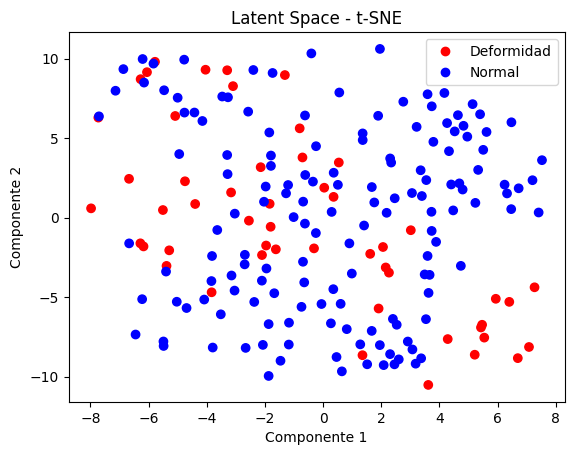

In [26]:


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

checkpoint = torch.load('modelo_autoencoder_conv1.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Obtener los embeddings latentes de las imágenes después del entrenamiento
latent_embeddings = []
for image, _ in loader.dataset:
    image = image.unsqueeze(0)
    
    latent_embedding = model.get_latent_representation(image)
    latent_embeddings.append(latent_embedding)
    
    
# Convertir los embeddings latentes en un tensor
latent_embeddings = torch.cat(latent_embeddings, dim=0)
    
# Convertir los embeddings latentes a un arreglo NumPy
embeddings_np = latent_embeddings.detach().numpy()

# Obtener la forma del tensor embeddings_np
num_samples, *embedding_dim = embeddings_np.shape

# Aplanar el arreglo embeddings_np
embeddings_2d = embeddings_np.reshape(num_samples, np.prod(embedding_dim))

# Aplicar t-SNE para reducir la dimensionalidad a 2 dimensiones
tsne = TSNE(n_components=2, init='random', learning_rate=200.0)
embeddings = tsne.fit_transform(embeddings_2d)


# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones
#pca = PCA(n_components=2)
#embeddings = pca.fit_transform(embeddings_2d)

# Crear una instancia de LLE y ajustar los datos
#lle_embedder = LocallyLinearEmbedding(n_components=2)
#embeddings = lle_embedder.fit_transform(embeddings_2d)





# Obtener las etiquetas de entrenamiento
etiquetas_entrenamiento = [loader.dataset.classes[label] for _, label in loader.dataset]

# Crear una lista de colores para asignar a cada clase
colores = ['red' if label == 'deformidad' else 'blue' for label in etiquetas_entrenamiento]

# Graficar los puntos de entrenamiento en el espacio latente
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=colores)
plt.title('Latent Space - t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Crear las leyendas manualmente
deformidad_patch = plt.plot([], [], 'o', color='red', label='Deformidad')[0]
normal_patch = plt.plot([], [], 'o', color='blue', label='Normal')[0]

plt.legend(handles=[deformidad_patch, normal_patch])
#plt.savefig('latent_space_after_training.png')

plt.show()



In [22]:

latent_embeddings = []

for image, _ in loader:
    
    
    # Obtén la representación latente
    latent_embedding = model.get_latent_representation(image)
    
    # Mueve el embedding a la CPU y agrega a la lista
    latent_embeddings.append(latent_embedding.cpu())

# Concatena los embeddings latentes en una única matriz
latent_embeddings = torch.cat(latent_embeddings, dim=0)

# Imprime la forma del espacio latente
print("Forma del espacio latente:", latent_embeddings.shape)


Forma del espacio latente: torch.Size([201, 4, 56, 56])


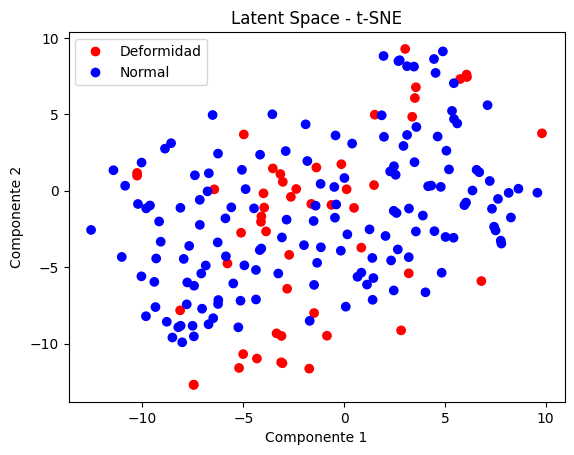

In [23]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from umap import UMAP


# Desvincular el tensor de su gráfico computacional
embeddings_np = latent_embeddings.detach().numpy()

# Aplanar el arreglo embeddings_np
num_samples, embedding_dim, height, width = embeddings_np.shape
embeddings_2d = embeddings_np.reshape(num_samples, embedding_dim * height * width)


# Aplicar t-SNE para reducir la dimensionalidad a 2 dimensiones
#tsne = TSNE(n_components=2, init='random', learning_rate='auto')
#embeddings = tsne.fit_transform(embeddings_2d)

# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones
#pca = PCA(n_components=2)
#embeddings = pca.fit_transform(embeddings_2d)


# Crear una instancia de LLE y ajustar los datos
#lle_embedder = LocallyLinearEmbedding(n_components=2)
#embeddings = lle_embedder.fit_transform(embeddings_2d)


# Crear una instancia de UMAP y ajustar los datos
#umap_embedder = UMAP(n_components=2)
#embeddings = umap_embedder.fit_transform(embeddings_2d)




# Obtener las etiquetas de entrenamiento
etiquetas_entrenamiento = [loader.dataset.classes[label] for _, label in loader.dataset]

# Crear una lista de colores para asignar a cada clase
# Crear una lista de colores para asignar a cada clase
colores = ['red' if label == 'deformidad' else 'blue' for label in etiquetas_entrenamiento]

# Graficar los puntos de entrenamiento en el espacio latente
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=colores)
plt.title('Latent Space - t-SNE')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Crear las leyendas manualmente
deformidad_patch = plt.plot([], [], 'o', color='red', label='Deformidad')[0]
normal_patch = plt.plot([], [], 'o', color='blue', label='Normal')[0]

plt.legend(handles=[deformidad_patch, normal_patch])
#plt.savefig('latent_space_before_training.png')

plt.show()


In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from umap import UMAP
from torch.utils.data import Subset
# Obtener el tensor de embeddings como una matriz numpy de dos dimensiones
#embeddings_np = latent_embeddings.detach().numpy()
#num_samples, embedding_dim, height, width = embeddings_np.shape
#embeddings_2d = embeddings_np.reshape(num_samples, embedding_dim * height * width)

# Definir el número de imágenes que deseas utilizar para la visualización
num_images = 201


# Crear un subconjunto del conjunto de datos original con el número de imágenes deseado
subset_entrenamiento = Subset(loader.dataset, range(num_images))

# Obtener el tensor de embeddings como una matriz numpy de dos dimensiones
embeddings_entrenamiento = model.get_latent_representation(subset_entrenamiento)

# Convertir las embeddings a una matriz numpy
embeddings_entrenamiento_np = embeddings_entrenamiento.detach().numpy()






# Crear una instancia de LLE y ajustar los datos
#lle_embedder = LocallyLinearEmbedding(n_components=2)
#embeddings = lle_embedder.fit_transform(embeddings_2d)



# Crear una instancia de UMAP y ajustar los datos
#umap_embedder = UMAP(n_components=2)
#embeddings = umap_embedder.fit_transform(embeddings_2d)



# Aplicar t-SNE para reducir la dimensionalidad a 2 dimensiones
tsne = TSNE(n_components=2, init='random', learning_rate='auto')
embeddings = tsne.fit_transform(embeddings_entrenamiento_np)


# Aplicar PCA para reducir la dimensionalidad a 2 dimensiones
#pca = PCA(n_components=2)
#embeddings = pca.fit_transform(embeddings_2d)





# Obtener las etiquetas de entrenamiento del subconjunto
etiquetas_entrenamiento = [loader.dataset.classes[label] for _, label in subset_entrenamiento]

# Crear una lista de colores para asignar a cada clase
colores = ['red' if label == 'deformidad' else 'blue' for label in etiquetas_entrenamiento]

# Graficar los puntos de entrenamiento en el espacio latente
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=colores)
plt.title('Latent Space - PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Agregar una leyenda
clases = ['Deformidad', 'Normal']
plt.legend(clases)

plt.show()



TypeError: conv2d() received an invalid combination of arguments - got (Subset, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mSubset[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mSubset[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [32;1mint[0m)


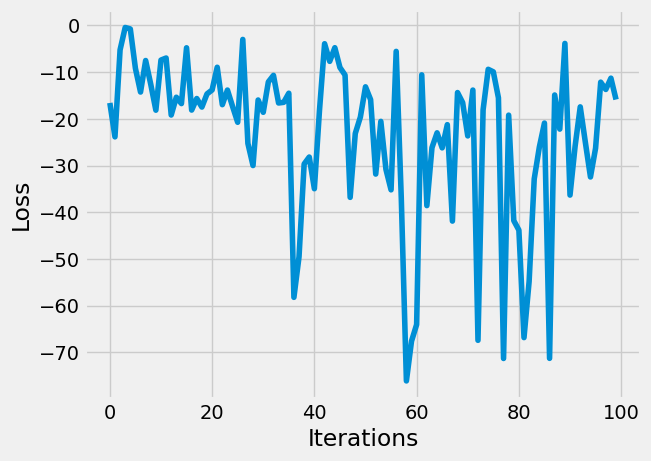

In [35]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the losses
plt.plot([loss.detach().numpy() for loss in losses[-100:]])
plt.show()


In [26]:


def get_all_latent_representations(self,loader):
    self.eval()
    latent_reps = []
    for images, _ in loader:
        images = images.to(device)
        latent_rep = self.get_latent_representation(images)
        latent_rep = latent_rep.squeeze().detach().cpu().numpy()
        latent_reps.append(latent_rep)
    return latent_reps


In [27]:
# Cargar el modelo
model = AE()
model.load_state_dict(torch.load('modelo_autoencoder_conv1.pth'))
model.eval()

# Obtener las representaciones en el espacio latente de las imágenes de pies sanos
latent_reps_sanos = []
for image in loader.dataset:
    image = image[0]
    latent_rep = model.get_latent_representation(image)
    latent_reps_sanos.append(latent_rep)

latent_rep = latent_rep.squeeze().detach().cpu().numpy()


In [28]:

latent_reps_deformidades = get_all_latent_representations(deformidades_loader)
latent_reps_deformidades = np.concatenate(latent_reps_deformidades, axis=0)


TypeError: get_all_latent_representations() missing 1 required positional argument: 'loader'

In [29]:
plt.scatter(latent_reps_sanos[:, 0], latent_reps_sanos[:, 1], label='Pies sanos')
plt.scatter(latent_reps_deformidades[:, 0], latent_reps_deformidades[:, 1], label='Pies con deformidades')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation')
plt.legend()
plt.show()


TypeError: list indices must be integers or slices, not tuple

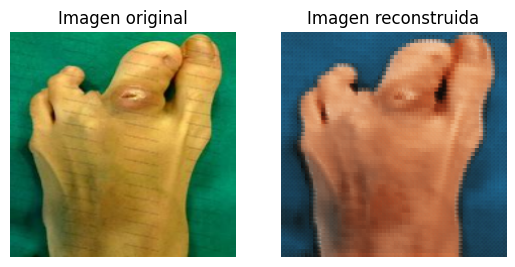

MSE: 0.010477057


In [54]:




'''


from PIL import Image
from skimage.metrics import structural_similarity as ssim
import numpy as np
import tensorflow as tf
# Cargar el modelo
model = AE()
model.load_state_dict(torch.load('modelo_autoencoder_conv.pth'))
model.eval()

# Ruta de la imagen que deseas cargar
#image_path = '/Users/guill/Escritorio/copiatest/'


image_path = '/Users/guill/Escritorio/copiatest/deformidades/deformidad3.jpeg'
image_name = os.path.basename(image_path)
# Cargar la imagen utilizando PIL
#image = Image.open(image_path).convert('L')  # Convierte a escala de grises si es necesario
image = Image.open(image_path)
# Aplicar las transformaciones necesarias
transform1 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])



image = transform1(image)  # Donde `transform` es la función de transformación utilizada para preparar las imágenes en el conjunto de entrenamiento


model.eval()
reconstructed_image = model(image)

reconstructed_image = reconstructed_image.detach().numpy()
image=image.permute(1, 2, 0)
reconstructed_image= reconstructed_image.transpose(1, 2, 0)

# Visualizar la imagen original y la reconstruida
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image)
axes[0].set_title('Imagen original')
axes[0].axis('off')
axes[1].imshow(reconstructed_image)
axes[1].set_title('Imagen reconstruida')
axes[1].axis('off')

plt.show()

# Convert the tensors to numpy arrays
image = image.squeeze().detach().cpu().numpy()
reconstructed_image = reconstructed_image.squeeze()

# Calculate the Mean Squared Error
mse = np.mean(np.square(image - reconstructed_image))

print("MSE:", mse)

import os.path

# Verificar si existe el archivo de resultados
if os.path.isfile('MSE_ulcer_risk.xlsx'):
    # Cargar el archivo existente en un DataFrame de pandas
    resultados = pd.read_excel('MSE_ulcer_risk.xlsx')
else:
    # Si no existe, crear un DataFrame vacío
    resultados = pd.DataFrame(columns=['Imagen', 'MSE'])

# Agregar los resultados del nuevo modelo al DataFrame
new_row = pd.DataFrame({'Imagen': [image_name], 'MSE': [mse]})
resultados = pd.concat([resultados, new_row], ignore_index=True)

# Guardar el DataFrame en un archivo de Excel
resultados.to_excel('MSE_ulcer_risk.xlsx', index=False)



'''

In [7]:




from PIL import Image
from skimage.metrics import structural_similarity as ssim
import numpy as np
import torch
import torchvision.transforms as transforms
import os
import pandas as pd

# Cargar el modelo
model = AE()
model.load_state_dict(torch.load('modelo_autoencoder_conv.pth'))
model.eval()

# Ruta de la carpeta que contiene las imágenes
folder_path = '/Users/guill/Escritorio/copiatest/normal/'

# Crear una lista para almacenar los resultados
results = []

# Recorrer todas las imágenes en la carpeta
for image_name in os.listdir(folder_path):
    # Construir la ruta completa de la imagen
    image_path = os.path.join(folder_path, image_name)

    # Cargar la imagen utilizando PIL
    image = Image.open(image_path)

    # Aplicar las transformaciones necesarias
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    image = transform(image)

    # Usar el autoencoder para reconstruir la imagen
    model.eval()
    reconstructed_image = model(image)
    
    reconstructed_image = reconstructed_image.detach().numpy()
    
    image=image.permute(1, 2, 0)
    reconstructed_image= reconstructed_image.transpose(1, 2, 0)

    # Convert the tensors to numpy arrays
    image = image.squeeze().detach().cpu().numpy()
    reconstructed_image = reconstructed_image.squeeze()

     # Calculate the Mean Squared Error
    mse = np.mean(np.square(image - reconstructed_image))
    
    # Agregar los resultados a la lista
    results.append({'Imagen': image_name, 'MSE': mse})

# Crear un DataFrame con los resultados
resultados = pd.DataFrame(results)

# Guardar el DataFrame en un archivo de Excel
resultados.to_excel('MSE_ulcer_risk_normal.xlsx', index=False)
